# German traffic sign classification

### Aufgaben:
1. Schauen Sie sich das Notebook „data exploration.ipynb“ an, um eine Idee von dem „German Traffic Sign Recognition“-Datensatz zu bekommen.
2. Das Notebook „student_task.ipynb“ gibt eine grobe Struktur vor, wie Sie  Ihr Modell trainieren können. Wählen Sie eines der aufgelisteten  Projekte aus oder denken Sie sich ein ähnliches Projekt für das  Praktikum aus. Das Ziel ist es, sich mit dem Vorgang, ein Modell in  Python zu trainieren, vertraut zu machen.
    - Erstellen Sie ein Convolutional Neural Network und ein Fully Connected Neural Network und vergleichen Sie die Leistung beider Modelle mit Ihrem Modell.
    - Trainieren Sie ein Modell mit farbigen und ein Modell mit grauen Bildern (Farbbilder umgewandelt in Graustufen) und vergleichen Sie die Performance von beiden Modellen mit Ihrem Modell.
    - Benutzen Sie das Framework [Optuna](https://optuna.readthedocs.io/en/stable/index.html), um die Hyperparameter (Anzahl Layer, Anzahl Neuronen pro Layer, …) Ihres Modells zu optimieren. Welchen Vorteil bringt es [Optuna](https://optuna.readthedocs.io/en/stable/index.html) zu nutzen?
    - Trainieren Sie ein Modell mit einer hohen Accuracy und ein Modell mit einer geringen Latenz. Wie stark unterscheidet sich die Latenz und Accuracy von beiden Modellen. Die Latenz ist die Zeit, die das Modell braucht, ein Verkehrsschild zu klassifizieren.
    - Machen Sie eigene Bilder von Schildern und testen Sie Ihr Modell mit den eigenen Bildern. Variieren Sie Lichtverhältnisse, Wetter, … Die Bilder in den Trainingsdaten haben eine Auflösung von 32 x 32 Pixeln.
3. Erstellen Sie eine kurze Präsentation, die Ihr Projekt vorstellt. Laden Sie die Präsentation, Ihren Code und Ihre finalen Modelle in der ILU-Gruppe hoch.
4.	Bei der Praktikumsabgabe müssen Sie ein Multiple Choice Test (MCT) zum Praktikum ausfüllen. Es wird getestet, ob Sie verstanden haben, wie ein Convolutional Neural Network in Python erstellt und trainiert wird. Sie müssen bei der Praktikumsabgabe **<u>keine</u> Präsentation** halten.


# Import libraries and datasets

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random
import os

In [2]:
with open(os.path.join("..","dataset","train.p"), mode='rb') as training_data:
    train = pickle.load(training_data)
with open(os.path.join("..","dataset","valid.p"), mode='rb') as validation_data:
    valid = pickle.load(validation_data)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']

In [3]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)

In [4]:
# Normalize image to [0, 1]
X_train_norm = X_train / 255
X_valid_norm = X_valid / 255

Error in callback <function _draw_all_if_interactive at 0x000001EA6CB7DE40> (for post_execute), with arguments args (),kwargs {}:


ValueError: arrays must be of dtype byte, short, float32 or float64

ValueError: arrays must be of dtype byte, short, float32 or float64

<Figure size 640x480 with 1 Axes>

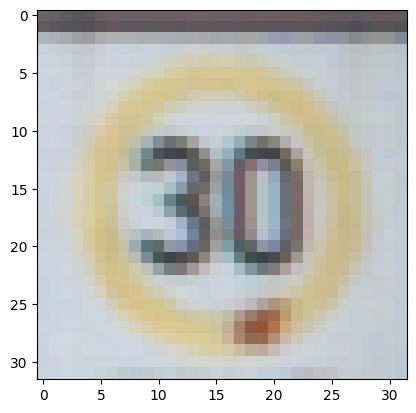

In [5]:
# Check that the images have been correctly converted and normalised
i = random.randint(1, len(X_train_norm))
plt.grid(False)
plt.imshow(X_train[i])
plt.figure()
plt.grid(False)
plt.imshow(X_train_norm[i].squeeze(), cmap = 'gray') # cmap

# Create the Convolutional Neural Network with keras
For example a CNN that recognises handwritten numbers: [https://adamharley.com/nn_vis/cnn/2d.html](https://adamharley.com/nn_vis/cnn/2d.html)
Here a fully connected neural network that also recognise handwritten numbers: [https://adamharley.com/nn_vis/mlp/2d.html](https://adamharley.com/nn_vis/mlp/2d.html)

Use model.add() to add a [Layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers) to your model. Here is a list of layers that might be useful:
- [Convolution Layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D): layers.Conv2D()
- [Average Pooling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D): layers.AveragePooling2D()
- [Max Pooling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D): layers.MaxPool2D()
- [Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout): layers.Dropout()
- [Flattens](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) the input. 2D -> 1D: layers.Flatten()
- [Densely-connected NN layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense): layers.Dense()

In [6]:
from tensorflow.keras import datasets, layers, models
model = models.Sequential()

# Only in the first layer you have to select the input_shape of the data (image).
model.add(layers.Conv2D( filters = 32 , kernel_size = ( 5 , 5), padding = "same" , activation = "relu" , input_shape = ( 32 , 32 , 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters = 64, kernel_size=(3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(filters = 128, kernel_size=(3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(43, activation='sigmoid'))

# Prints a summary of your network
model.summary()

C:\Users\Dima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 5, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165,995 (648.42 KB)

 Trainable params: 165,995 (648.42 KB)

 Non-trainable params: 0 (0.00 B)

# Compile your model
When you want, you can change the [optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) or the [loss function](https://www.tensorflow.org/api_docs/python/tf/keras/losses).

In [7]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train your model
The documentation of the fit method: [https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)

In [8]:
# TODO: Choose the batch size and the epochs
history = model.fit(x = X_train_norm,
                    y = y_train,
                    batch_size = 32,
                    epochs = 10,
                    verbose = 1,
                    validation_data = (X_valid_norm, y_valid))

Epoch 1/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.2661 - loss: 2.6959 - val_accuracy: 0.8633 - val_loss: 0.5141
Epoch 2/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.8461 - loss: 0.4898 - val_accuracy: 0.9401 - val_loss: 0.2503
Epoch 3/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9247 - loss: 0.2364 - val_accuracy: 0.9422 - val_loss: 0.2258
Epoch 4/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.9518 - loss: 0.1521 - val_accuracy: 0.9633 - val_loss: 0.1412
Epoch 5/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.9633 - loss: 0.1235 - val_accuracy: 0.9612 - val_loss: 0.1332
Epoch 6/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9670 - loss: 0.1081 - val_accuracy: 0.9762 - val_loss: 0.0918
Epoch 7/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9715 - loss: 0.0959 - val_accuracy: 0.9769 - val_loss: 0.0827
Epoch 8/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9717 -

# Save your model
Create a folder for your models

In [9]:
model.save('saved_model/my_rgb_model.h5')

# Analyse the results

In [10]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [11]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

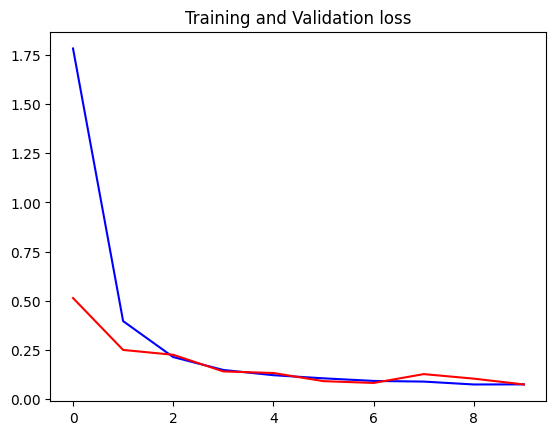

In [12]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation loss')

Text(0.5, 1.0, 'Training and Validation accuracy')

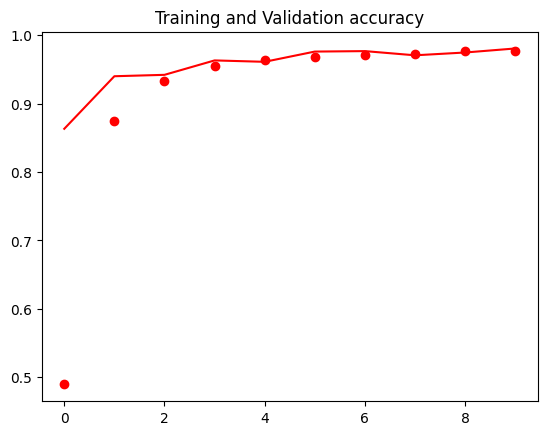

In [13]:
plt.plot(epochs, accuracy, 'ro', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')

# Load your model

In [14]:
model = tf.keras.models.load_model('saved_model/my_rgb_model.h5')

# Test your model with the test dataset
If you don't have the test dataset use the validation dataset.

In [15]:
score = model.evaluate(X_valid_norm, y_valid)
print('Test Accuracy: {}'.format(score[1]))

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9825 - loss: 0.0587
Test Accuracy: 0.9807256460189819


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
The predicted class of the image is: 24
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
[39 10 13 ... 14 41  0]


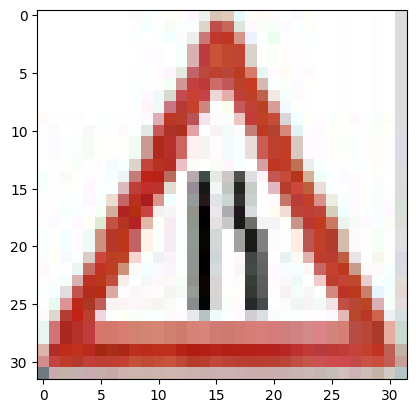

In [34]:
from sklearn.metrics import confusion_matrix
from keras.preprocessing import image
image_to_predict = image.load_img(os.path.join("..","dataset","right_narrow.png"), target_size=(32, 32))
img_array = image.img_to_array(image_to_predict)
img_array /= 255.0
img_array = np.expand_dims(img_array, axis=0)
plt.clf()
plt.grid(False)
plt.imshow(img_array[0], cmap = 'gray') # cmap
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=-1)[0]
print(f'The predicted class of the image is: {predicted_class}')
predicted_classes = np.argmax(model.predict(X_valid_norm), axis=-1)
y_true = y_valid
cm = confusion_matrix(y_true, predicted_classes)

<Axes: >

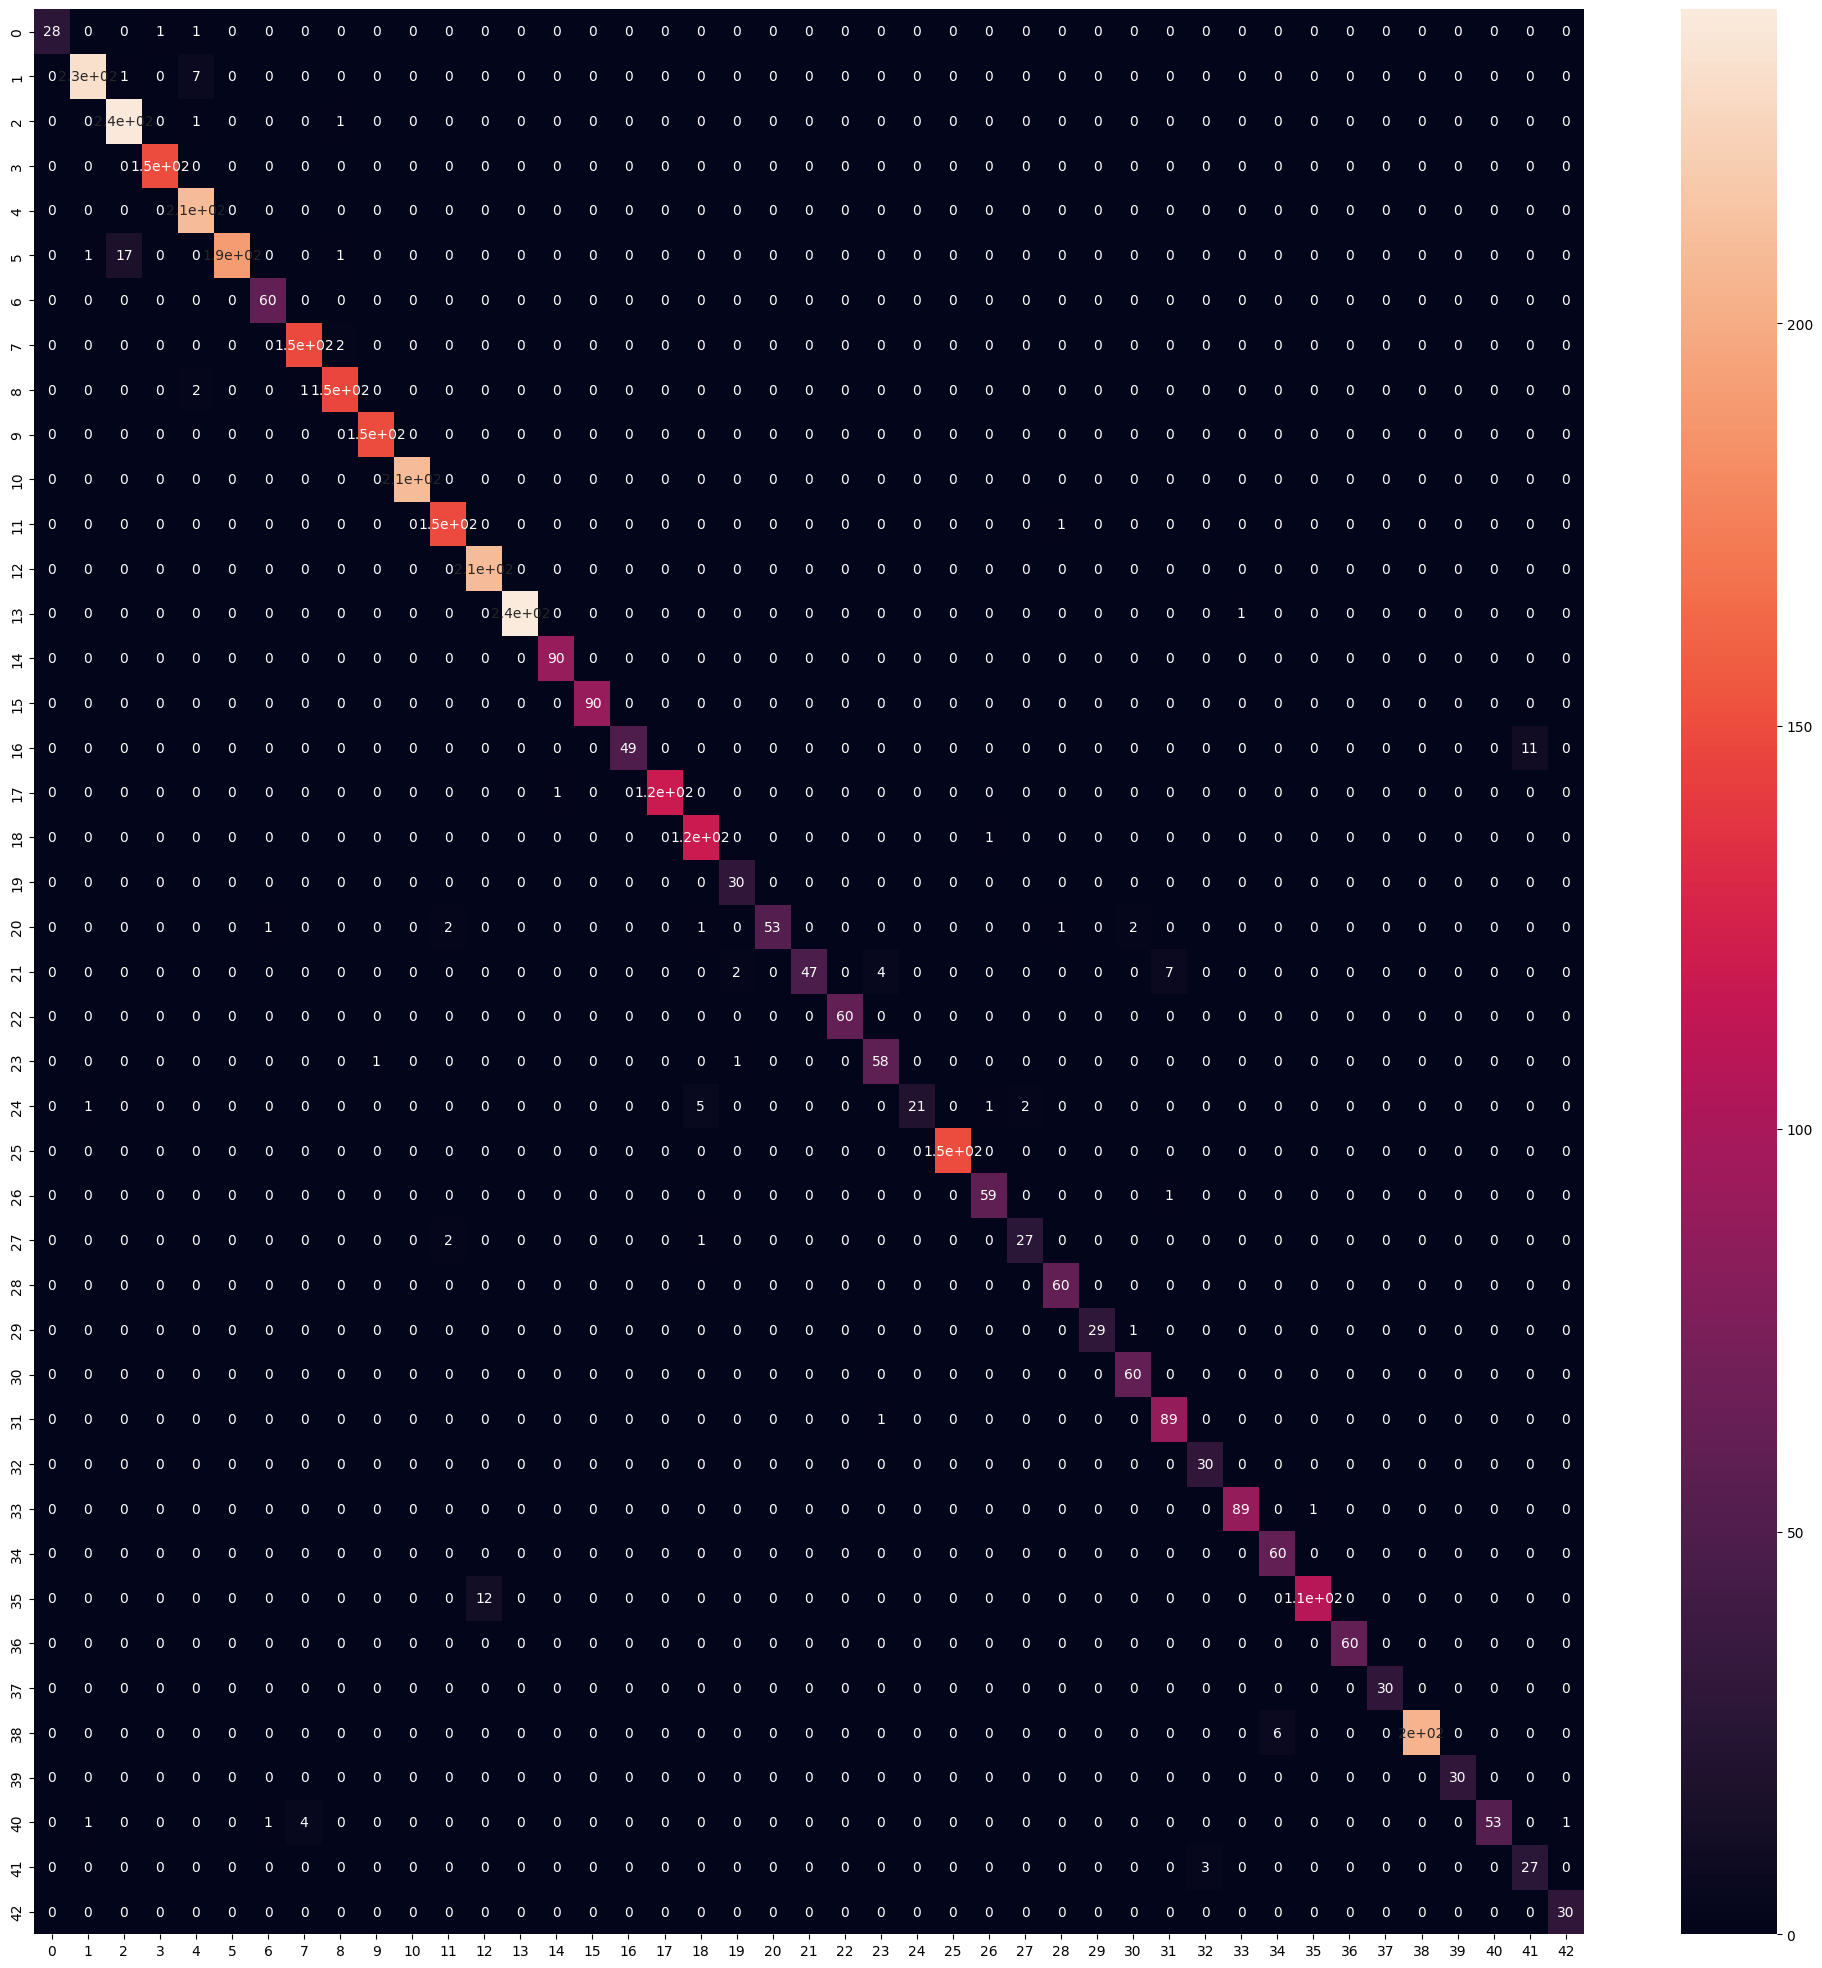

In [17]:
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)